### Mebocost on Allen Brain

Dataset: https://github.com/AllenInstitute/abc_atlas_access/blob/main/descriptions/Zhuang-ABCA-1.md (section 80)

From https://github.com/zhengrongbin/MEBOCOST/blob/master/Demo_Communication_Prediction.ipynb

##### Benedetta Manzato (LUMC)

##### 12-06-2024

##### VIB Spatial omics Hackathon

In [9]:
import scanpy as sc
import numpy as np
import pandas as pd
import os,sys
from matplotlib import pyplot as plt
import seaborn as sns

from mebocost import mebocost

##### Read and preprocess data

In [10]:
path = '/exports/humgen/bmanzato/hackathon/data/'
adata = sc.read_h5ad(f"{path}raw/Zhuang-ABCA-1-raw.h5ad")
df_cell = pd.read_csv(f"{path}raw/cell_metadata_with_cluster_annotation.csv", index_col=0)
df_gene = pd.read_csv(f"{path}raw/gene_metadata.csv", index_col=0)

adata.var = df_gene

In [11]:
# read adata
adata = sc.read_h5ad('./data/processed/Zhuang_2023_merfish_brain.h5ad')

# log transform and set as X assay
adata.layers["log"] = np.log1p(adata.X)
adata.layers["raw"] = adata.X
adata.X = adata.layers["log"]

# change variable index to gene symbol
adata.var.index = adata.var['gene_symbol']

adata.obs.head()

,brain_section_label,brain_section_label_right,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,dataset_id,sample_id,donor_id,condition_id,tissue,organism,assay_ontology,assay,celltype,fov
cell_label,,,,,,,,,,,,,,,,,,,,,
299794030110334465835331169565547130392,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,196.0,5.873824,1.246374,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
66045375924099067525605874805924532486,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,196.0,5.066814,1.215444,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
116791314340621211157298988846240231316,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,196.0,4.681061,1.287158,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
13950435409550353848526753205083905255,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,174.0,4.708601,1.292049,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
147436316185400258367147717470263928395,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,174.0,4.729919,1.285492,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080


##### Initiate mebocost object from adata

In [12]:
mebo_obj = mebocost.create_obj(
                        adata = adata,
                        group_col = ['celltype'],
                        met_est = 'mebocost',
                        config_path = './mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='mouse',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        gene_network=None,
                        gmt_path=None,
                        cutoff_exp='auto', ## automated cutoff to exclude lowly ranked 25% sensors across all cells
                        cutoff_met='auto', ## automated cutoff to exclude lowly ranked 25% metabolites across all cells
                        cutoff_prop=0.25, ## at lease 25% of cells should be expressed the sensor or present the metabolite in the cell group (specified by group_col)
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )


[June 12, 2024 15:30:04]: We get expression data with 1122 genes and 37068 cells.
[June 12, 2024 15:30:04]: scanpy object contains less than 5000 genes, please make sure you are using raw.to_adata()
[June 12, 2024 15:30:06]: Data Preparation Done in 1.3791 seconds


In [13]:
## 【optional】only estimate metabolite enzyme expression for cells using expression data
## this estimation actually included in infer_commu function, if you want 
## two steps include loading config and running estimator
mebo_obj._load_config_()
mebo_obj.estimator()

[June 12, 2024 15:30:06]: Load config and read data based on given species [mouse].
[June 12, 2024 15:30:07]: Estimtate metabolite level using mebocost


Spot x metabolite matrix:

In [14]:
## check the metabolite estimation result
met_mat = pd.DataFrame(mebo_obj.met_mat.toarray(),
                      index = mebo_obj.met_mat_indexer,
                      columns = mebo_obj.met_mat_columns)

met_mat.head()

,299794030110334465835331169565547130392,66045375924099067525605874805924532486,116791314340621211157298988846240231316,13950435409550353848526753205083905255,147436316185400258367147717470263928395,155339993840169864505671772730622577524,170383797998459769219679751052575037464,228369699560856617195493857879144406636,271130224658132770525358661203854916430,271770714097096790527850541104804548138,...,199025041380332701273572675507010895838,234730522831713536912982985150115275478,4012525401531341277895554358592786908,52036810366258297710079231943069128748,101487149983671375675498334564957709918,138771139060049685442837890240266124575,293280579073114219480073630362346662120,29789632307409269107735464912172084480,63992048193478335418190347526482691865,217820882131375786118651898970174983535
HMDB0004244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HMDB0001336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HMDB0006242,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.5,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
HMDB0001866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HMDB0002281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
## metabolic communication inference
## Note: by default, this function include estimator for metabolite abundance
mebo_obj.infer_commu(
                    n_shuffle=1000,
                    seed=12345, 
                    Return=False, 
                    thread=None,
                    save_permuation=False,
                    min_cell_number = 1
                )

[June 12, 2024 15:30:19]: Load config and read data based on given species [mouse].
[June 12, 2024 15:30:21]: Estimtate metabolite level using mebocost
[June 12, 2024 15:30:34]: Infer communications
[June 12, 2024 15:30:34]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[June 12, 2024 15:30:34]: Parameters: {shuffling: 1000 times, random seed: 12345, thread: 8}
[June 12, 2024 15:31:22]: met_sensor: (32, 8)
[June 12, 2024 15:31:22]: avg_exp: (127, 24) for (gene, cell) of needed
[June 12, 2024 15:31:22]: avg_met: (66, 24) for (metabolite, cell) of needed
[June 12, 2024 15:31:22]: shuffling 1000 times for generating backgroud
[June 12, 2024 15:31:42]: take exp and met avg for shuffling
[June 12, 2024 15:33:54]: thread: 8
[June 12, 2024 15:33:57]: Slc6a3 ~ HMDB0000073
[June 12, 2024 15:33:58]: Normalizing Cluster Mean and Calculating Communication Score
[June 12, 2024 15:33:59]: Slc6a4 ~ HMDB0000259
[June 12, 2024 15:34:01]: Normalizing Cluster Mean and Calculating Commu

In [16]:
# save mebo object
mebocost.save_obj(obj = mebo_obj, path = path+'../MEBOCOST/output/allen_mebocost.pk')
## re-load the previous object if needed
mebo_obj = mebocost.load_obj(path+'../MEBOCOST/output/allen_mebocost.pk')

[June 12, 2024 15:41:27]: Data Preparation Done in 0.2665 seconds


##### Mebocost output

In [25]:
mebo_obj.commu_res.head()

,Sender,Metabolite,Metabolite_Name,Receiver,Sensor,Commu_Score,metabolite_prop_in_sender,sensor_prop_in_receiver,ztest_stat,ztest_pval,ttest_stat,ttest_pval,ranksum_test_stat,ranksum_test_pval,permutation_test_stat,permutation_test_pval,ztest_fdr,ttest_fdr,ranksum_test_fdr,permutation_test_fdr
78,06 CTX-CGE GABA,HMDB0000112,gamma-Aminobutyric acid,17 MH-LH Glut,Gabbr2,41.304832,0.926230,0.817485,-6709.202417,0.0,-212.057607,0.000000e+00,-1.730321,0.041786,0,0.0,0.0,0.000000e+00,0.246488,0.0
484,13 CNU-HYa Glut,HMDB0000292,Xanthine,04 DG-IMN Glut,Adora1,4.932628,0.914425,0.361111,-1137.921980,0.0,-35.966274,1.062918e-182,-1.730321,0.041786,0,0.0,0.0,3.018754e-181,0.246488,0.0
73,06 CTX-CGE GABA,HMDB0000292,Xanthine,02 NP-CT-L6b Glut,Adora1,5.198949,0.653005,0.847826,-1154.211005,0.0,-36.481121,3.333280e-186,-1.730321,0.041786,0,0.0,0.0,9.721364e-185,0.246488,0.0
0,01 IT-ET Glut,HMDB0000292,Xanthine,01 IT-ET Glut,Adora1,5.286253,0.819740,0.501565,-4307.200768,0.0,-136.137596,0.000000e+00,-1.730321,0.041786,0,0.0,0.0,0.000000e+00,0.246488,0.0
409,20 MB GABA,HMDB0000292,Xanthine,02 NP-CT-L6b Glut,Adora1,3.793007,0.571429,0.847826,-161.016407,0.0,-5.089242,2.146905e-07,-1.730321,0.041786,0,0.0,0.0,1.469976e-06,0.246488,0.0


##### Summary of the number of communication events
Sender and receiver event number

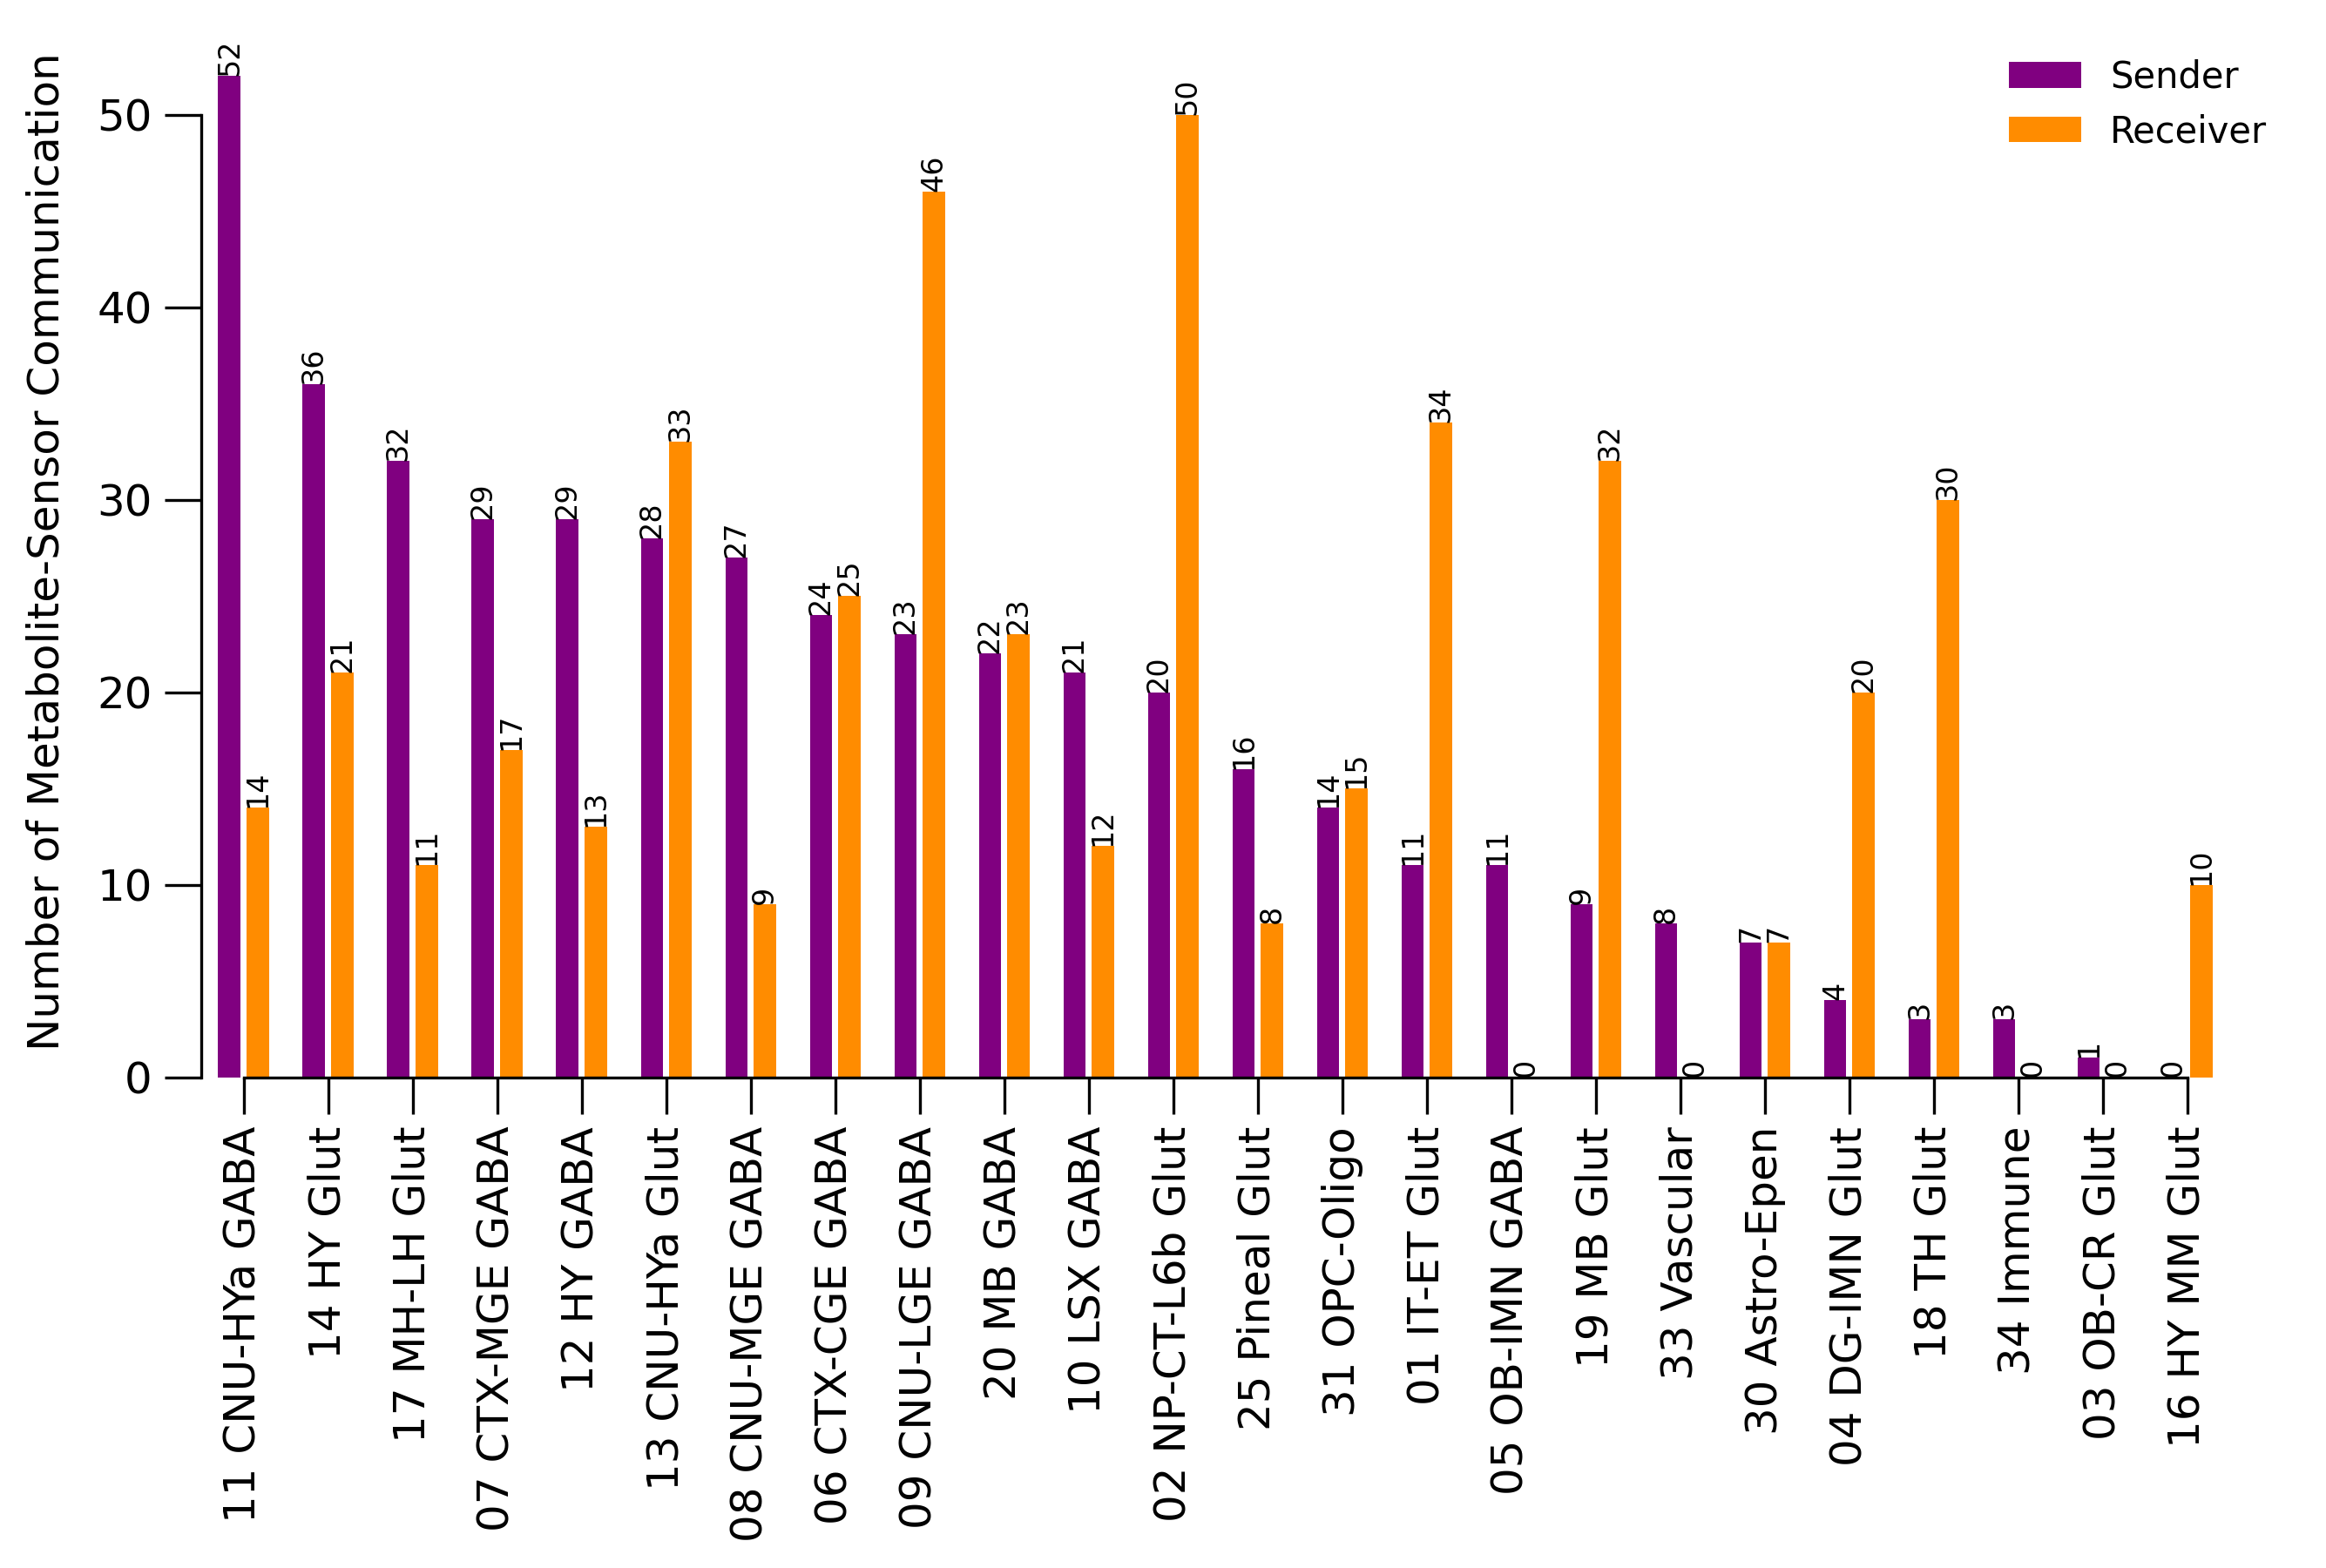

In [19]:
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save=None,
                    show_plot=True,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )


##### Summary of communication in cell-to-cell network
Circle plot to show communications between cell groups

[June 12, 2024 15:42:12]: show communication in cells by network plot


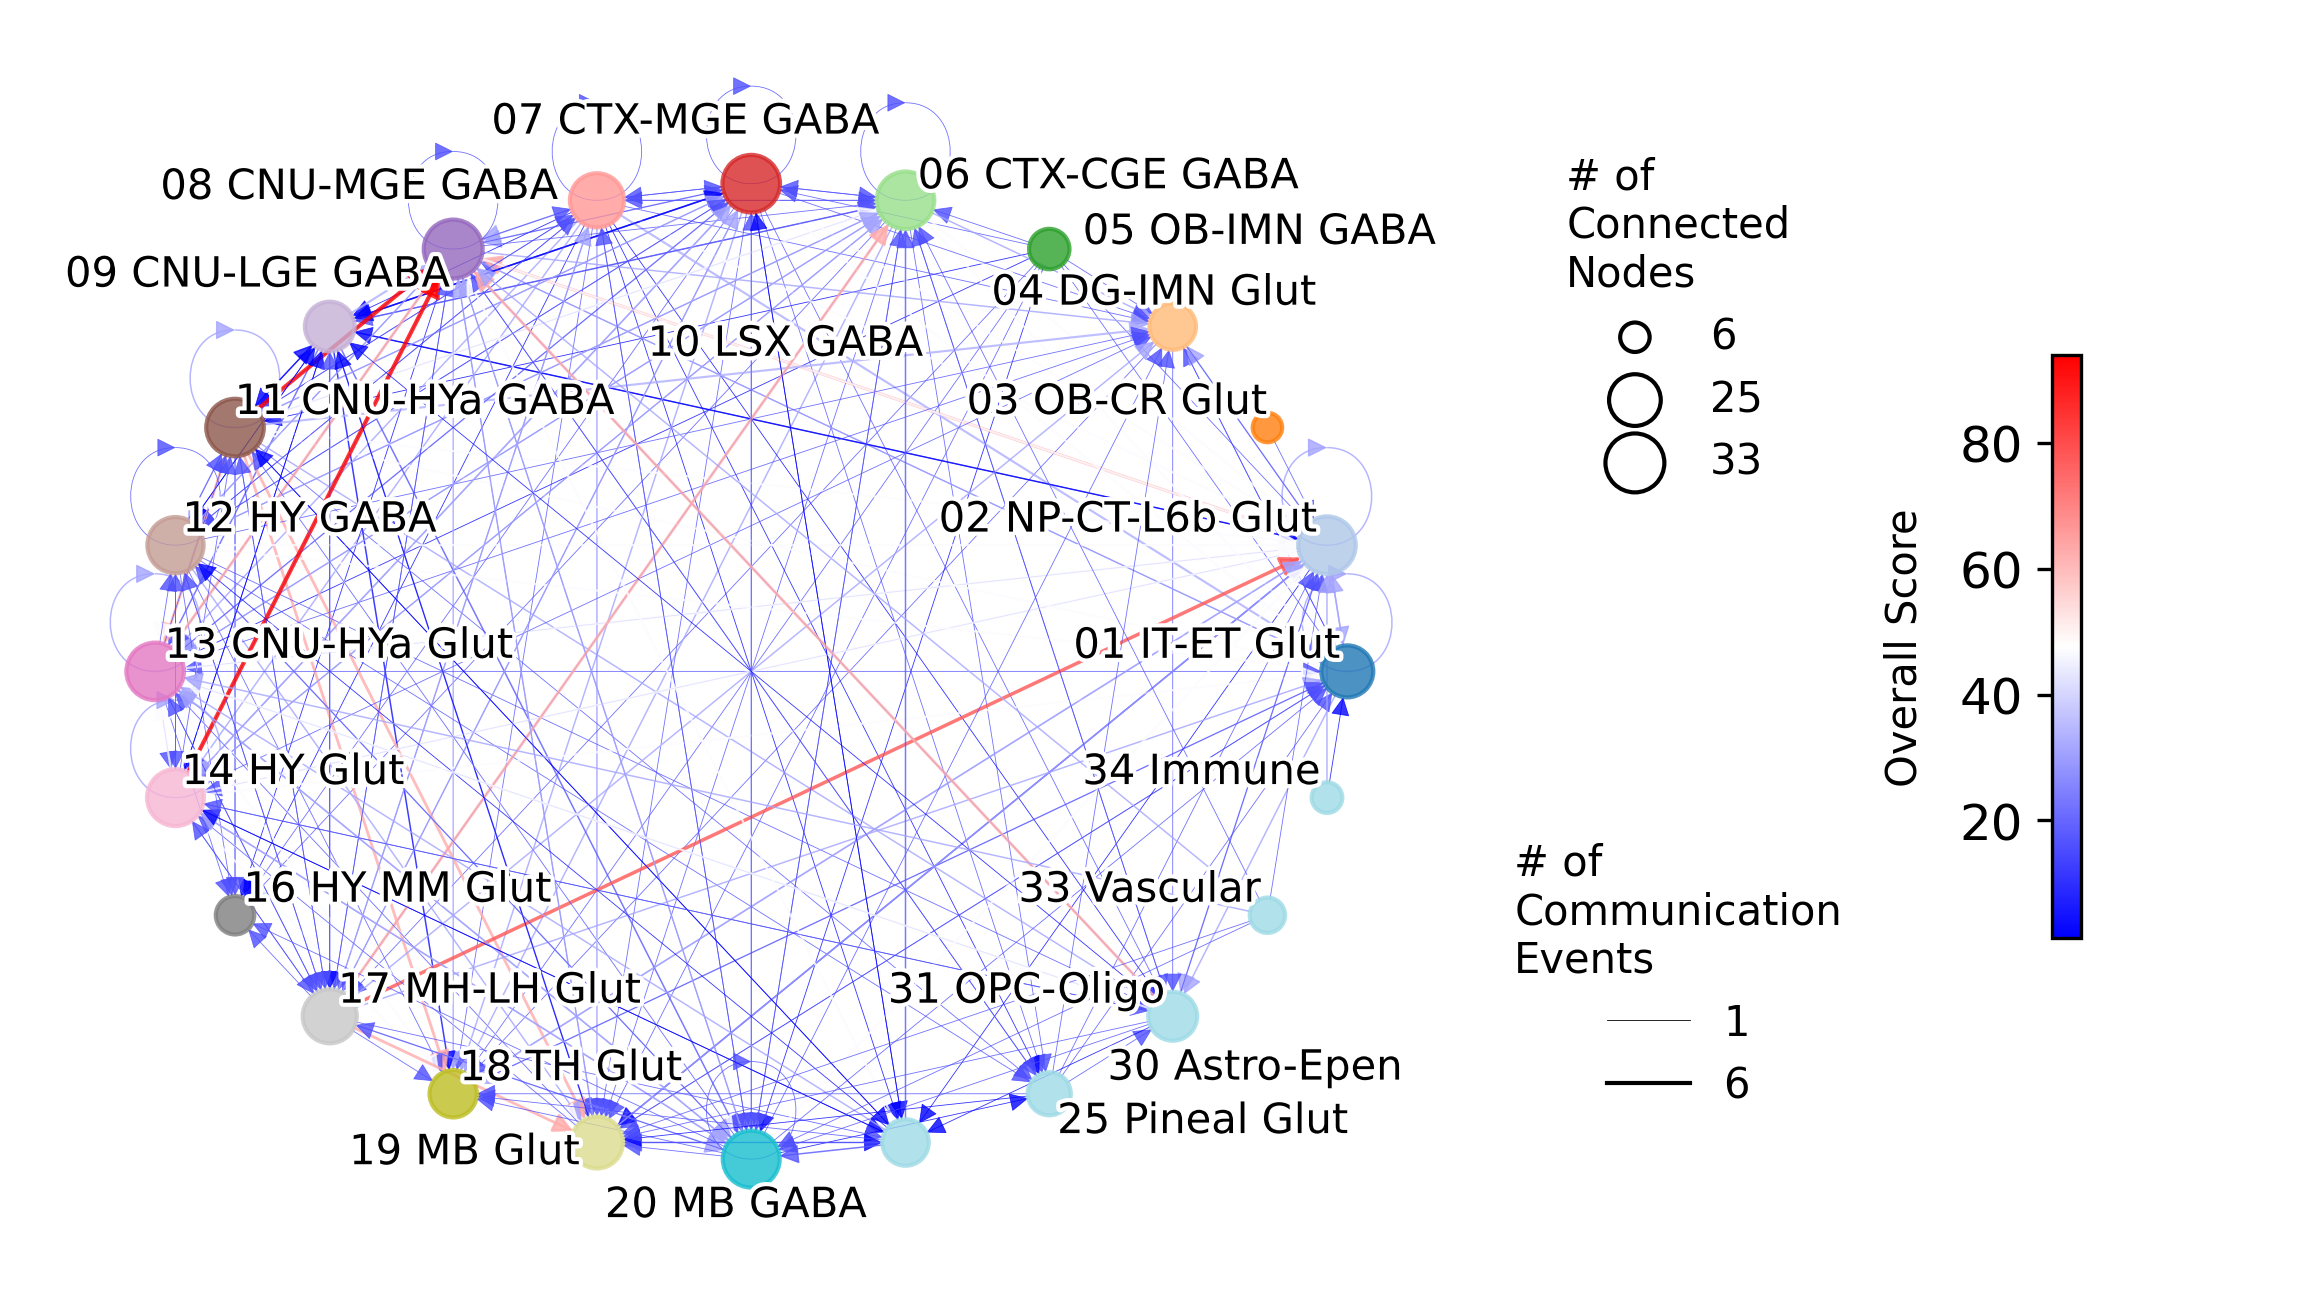

In [20]:
mebo_obj.commu_network_plot(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    node_cmap='tab20',
                    figsize='auto',
                    line_cmap='bwr',
                    line_color_vmin=None,
                    line_color_vmax=None,
                    linewidth_norm=(0.2, 1),
                    node_size_norm=(50, 200),
                    adjust_text_pos_node=True,
                    node_text_hidden = False,
                    node_text_font=10,
                    save=None,
                    show_plot=True,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff=0,
                    text_outline=True,
                    return_fig=False
                )

### the "overall score" represent the sum of -log10(FDR) of detected metabolite-sensor communications between a pair of cell types

##### Showing the communication between sender and receiver in a dot plot
Dot plot to show the number of communications between cells

[June 12, 2024 15:42:24]: plot dot plot to show communication in cell type level


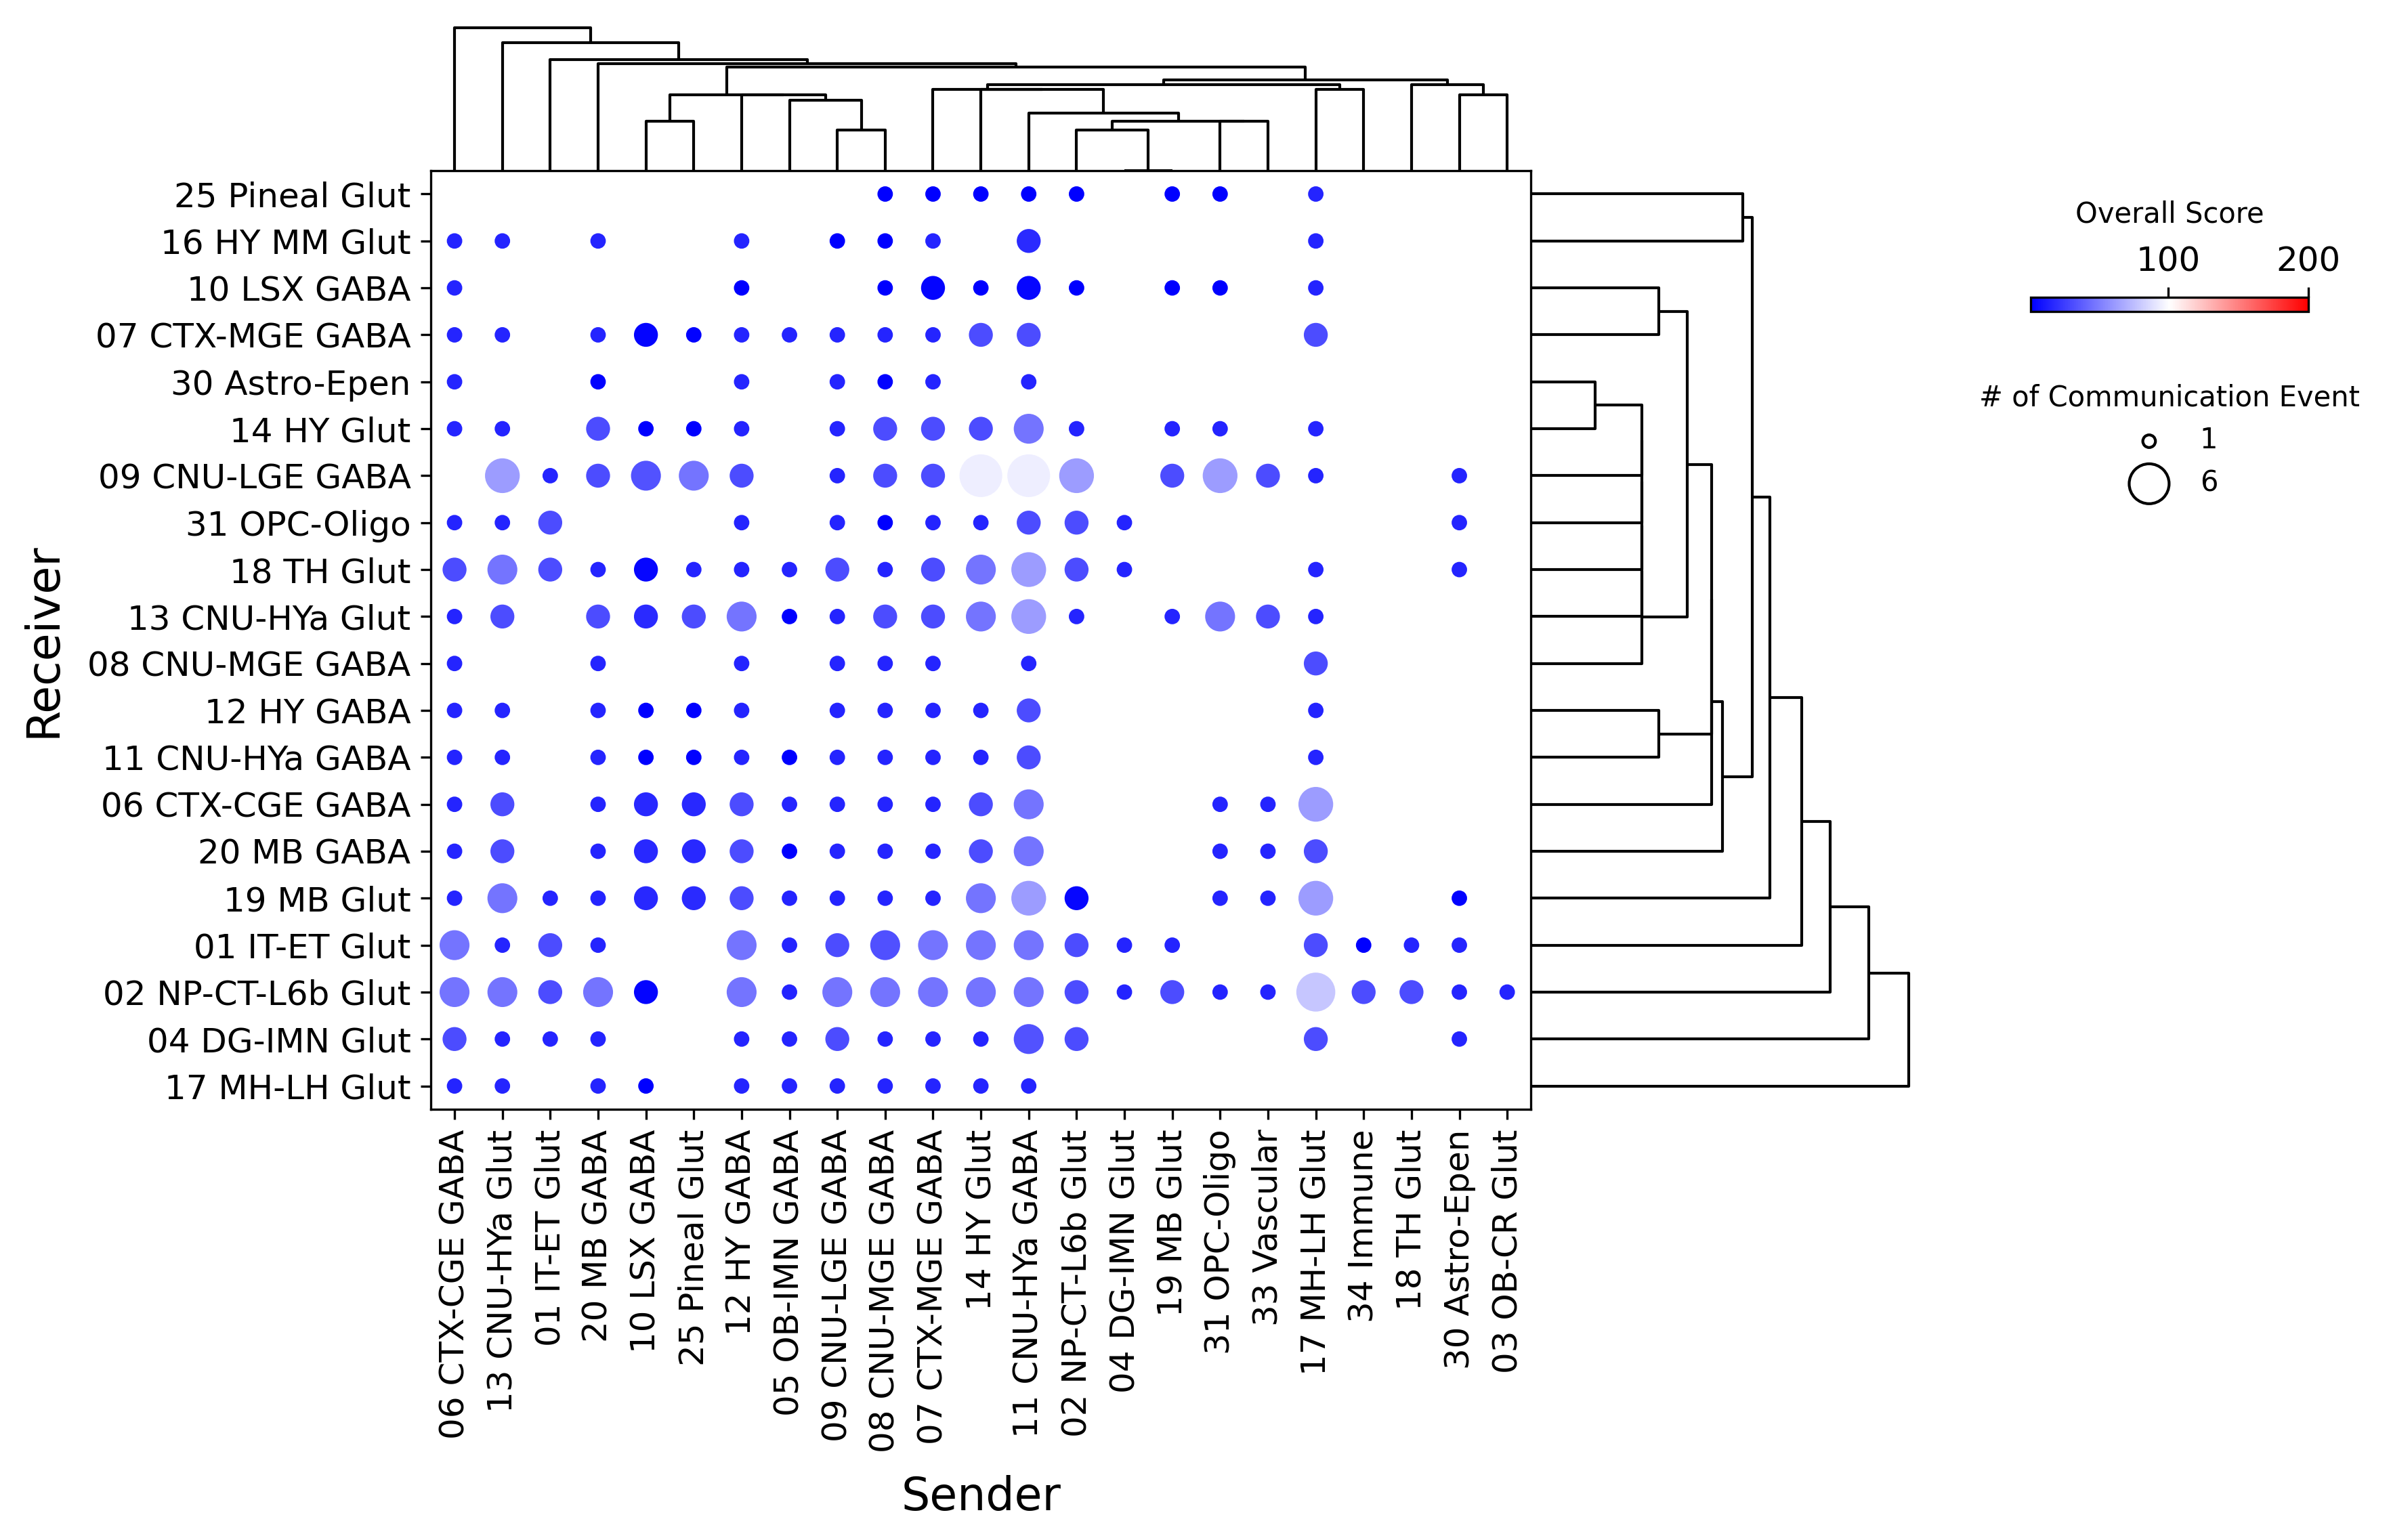

In [21]:
mebo_obj.count_dot_plot(
                        pval_method='permutation_test_fdr',
                        pval_cutoff=0.05,
                        cmap='bwr',
                        figsize='auto',
                        save=None,
                        dot_size_norm=(20, 200),
                        dot_color_vmin=None,
                        dot_color_vmax=200,
                        show_plot=True,
                        comm_score_col='Commu_Score',
                        comm_score_cutoff=0,
                        return_fig = False
                    )

[June 12, 2024 15:43:09]: Warnings: no sensors to plot
[June 12, 2024 15:43:09]: Find metabolites ['Histamine', 'Xanthine', 'Adenosine monophosphate', 'Serotonin', 'Dopamine', 'gamma-Aminobutyric acid', 'Acetylcholine', 'Retinal'] to plot violin


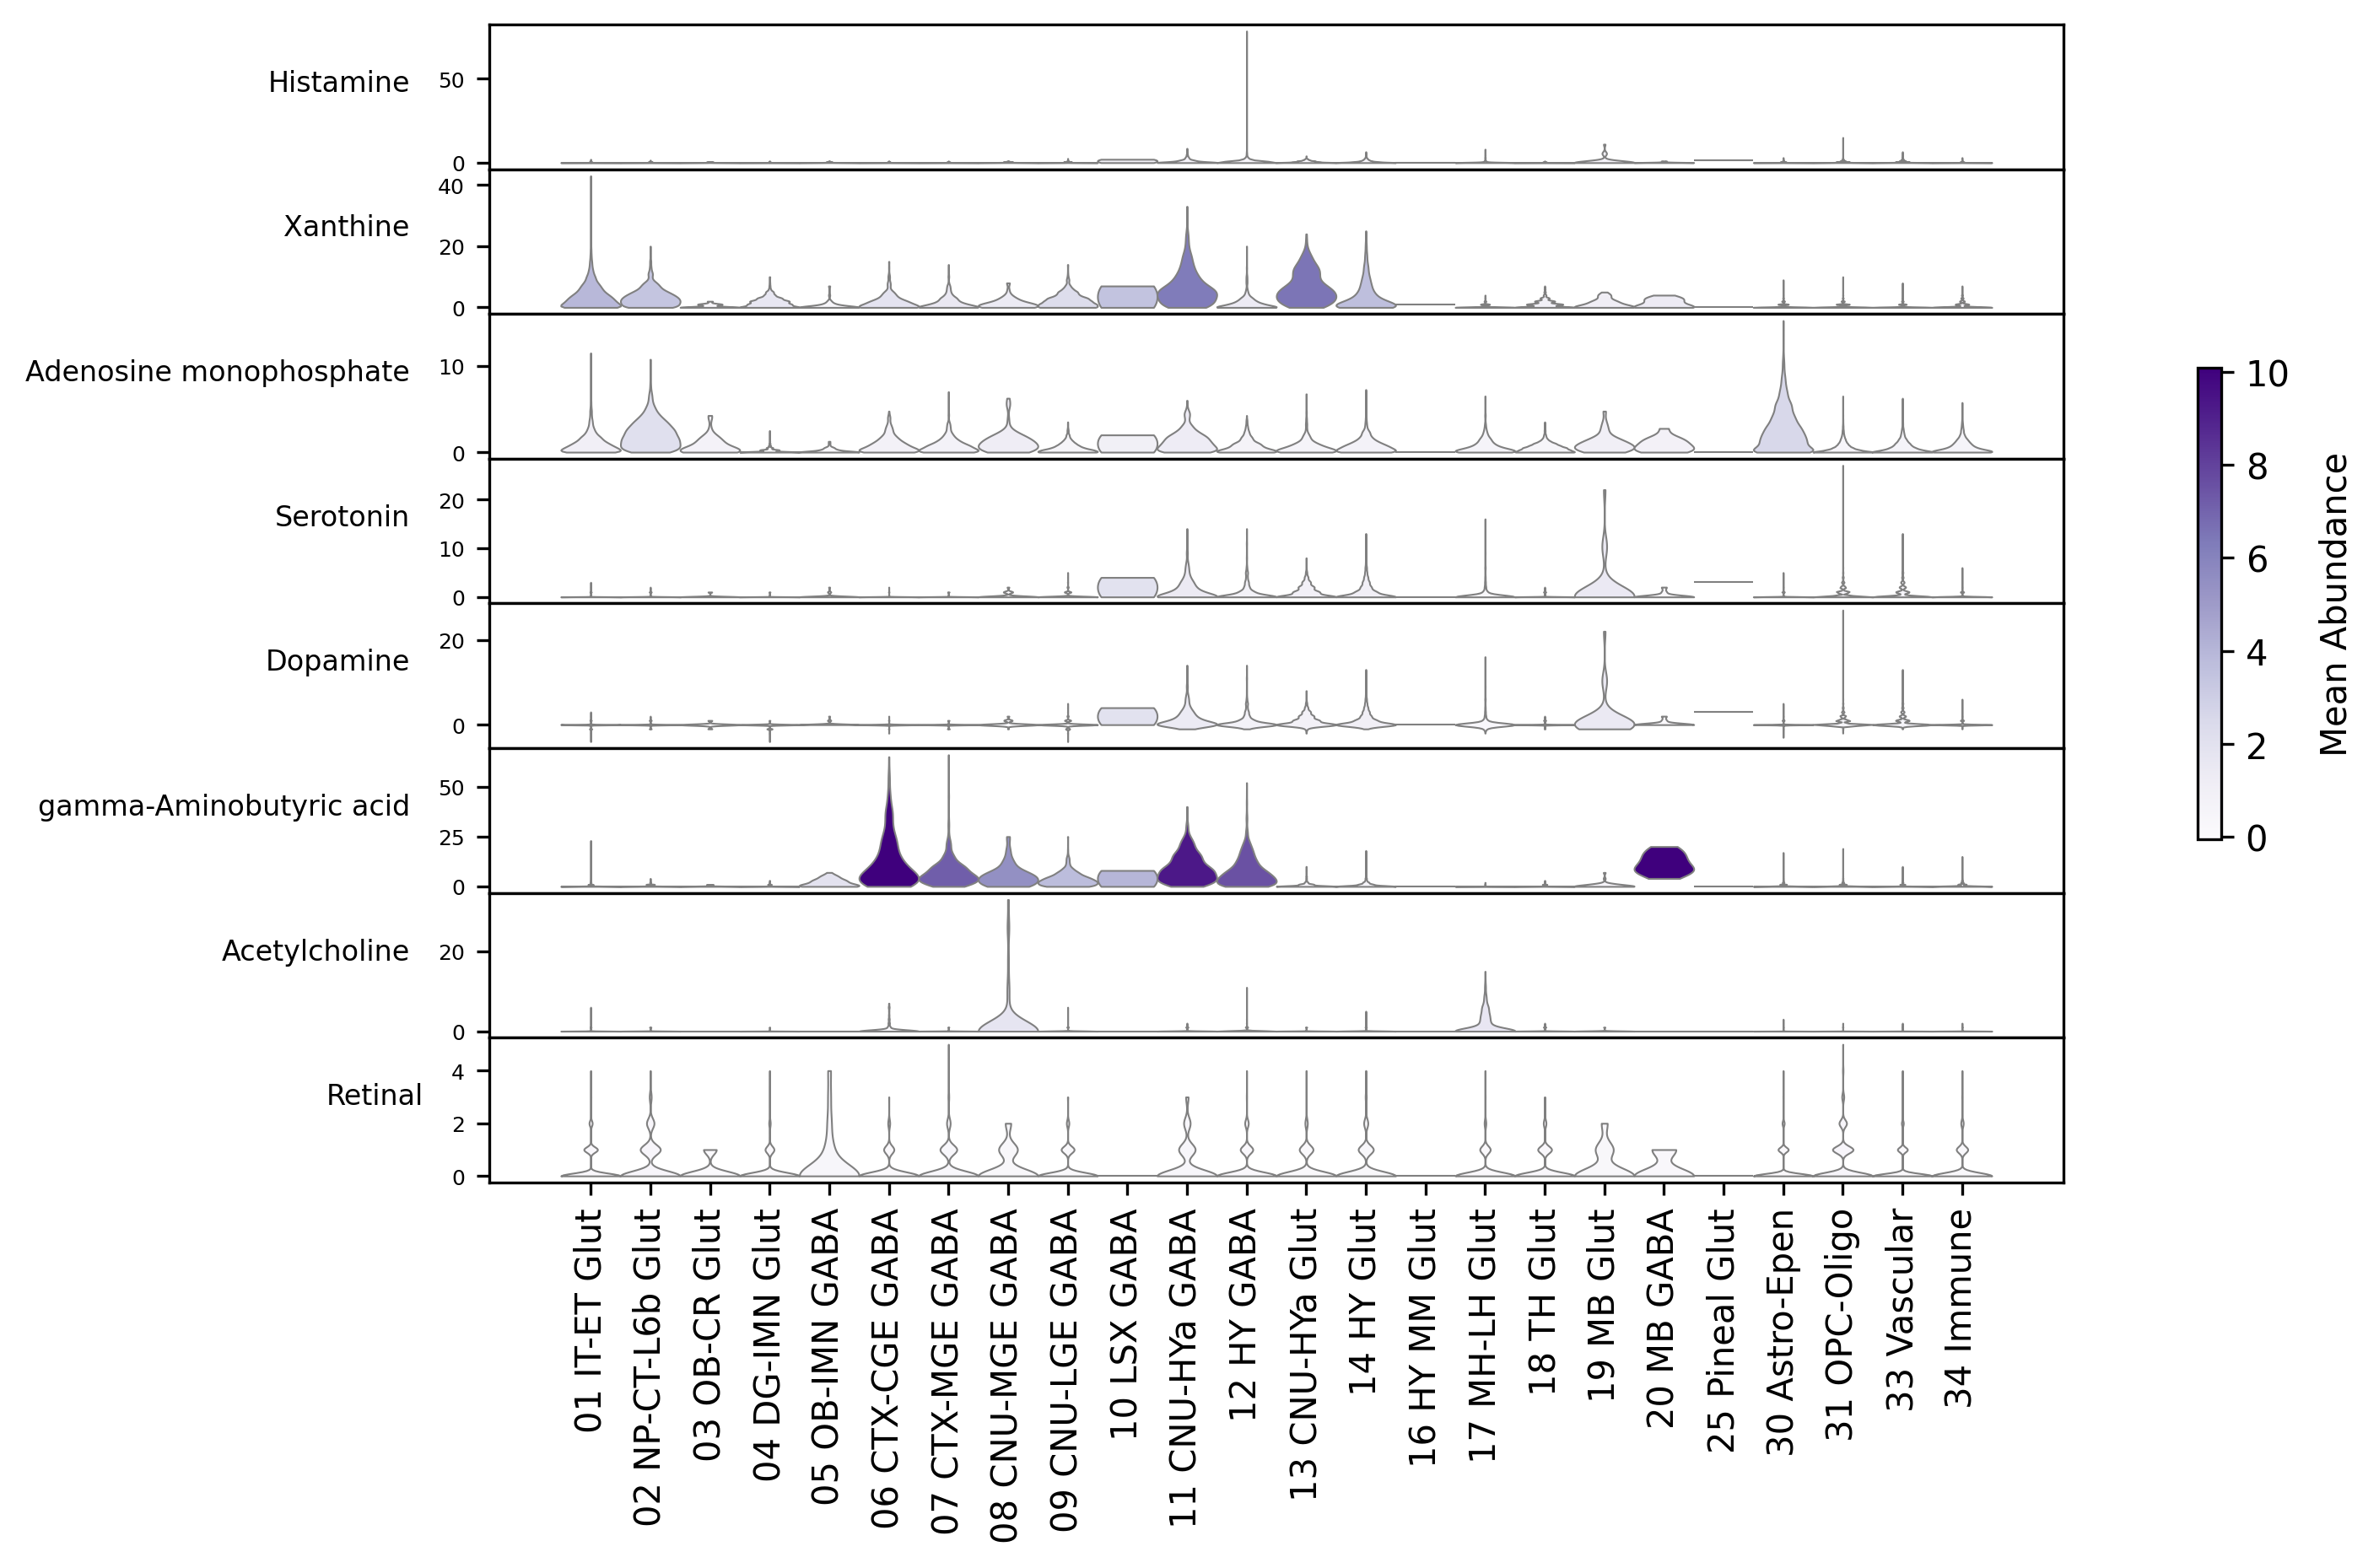

In [26]:
## violin plot to show the estimated metabolite abundance of informative metabolties in communication
### here we show five significant metabolites,
### users can pass several metabolites of interest by provide a list
commu_df = mebo_obj.commu_res.copy()
good_met = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Metabolite_Name'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_met, 
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )

[June 12, 2024 15:43:13]: Find genes Index(['Rxrg', 'Drd1', 'Gabbr2', 'Chrna4', 'Chrm1', 'Chrm3', 'Htr1b', 'Chrm2',
       'Rarb', 'Adora1', 'Chrna7', 'Hrh3', 'Drd2', 'Htr3a'],
      dtype='object', name='gene_symbol') to plot violin


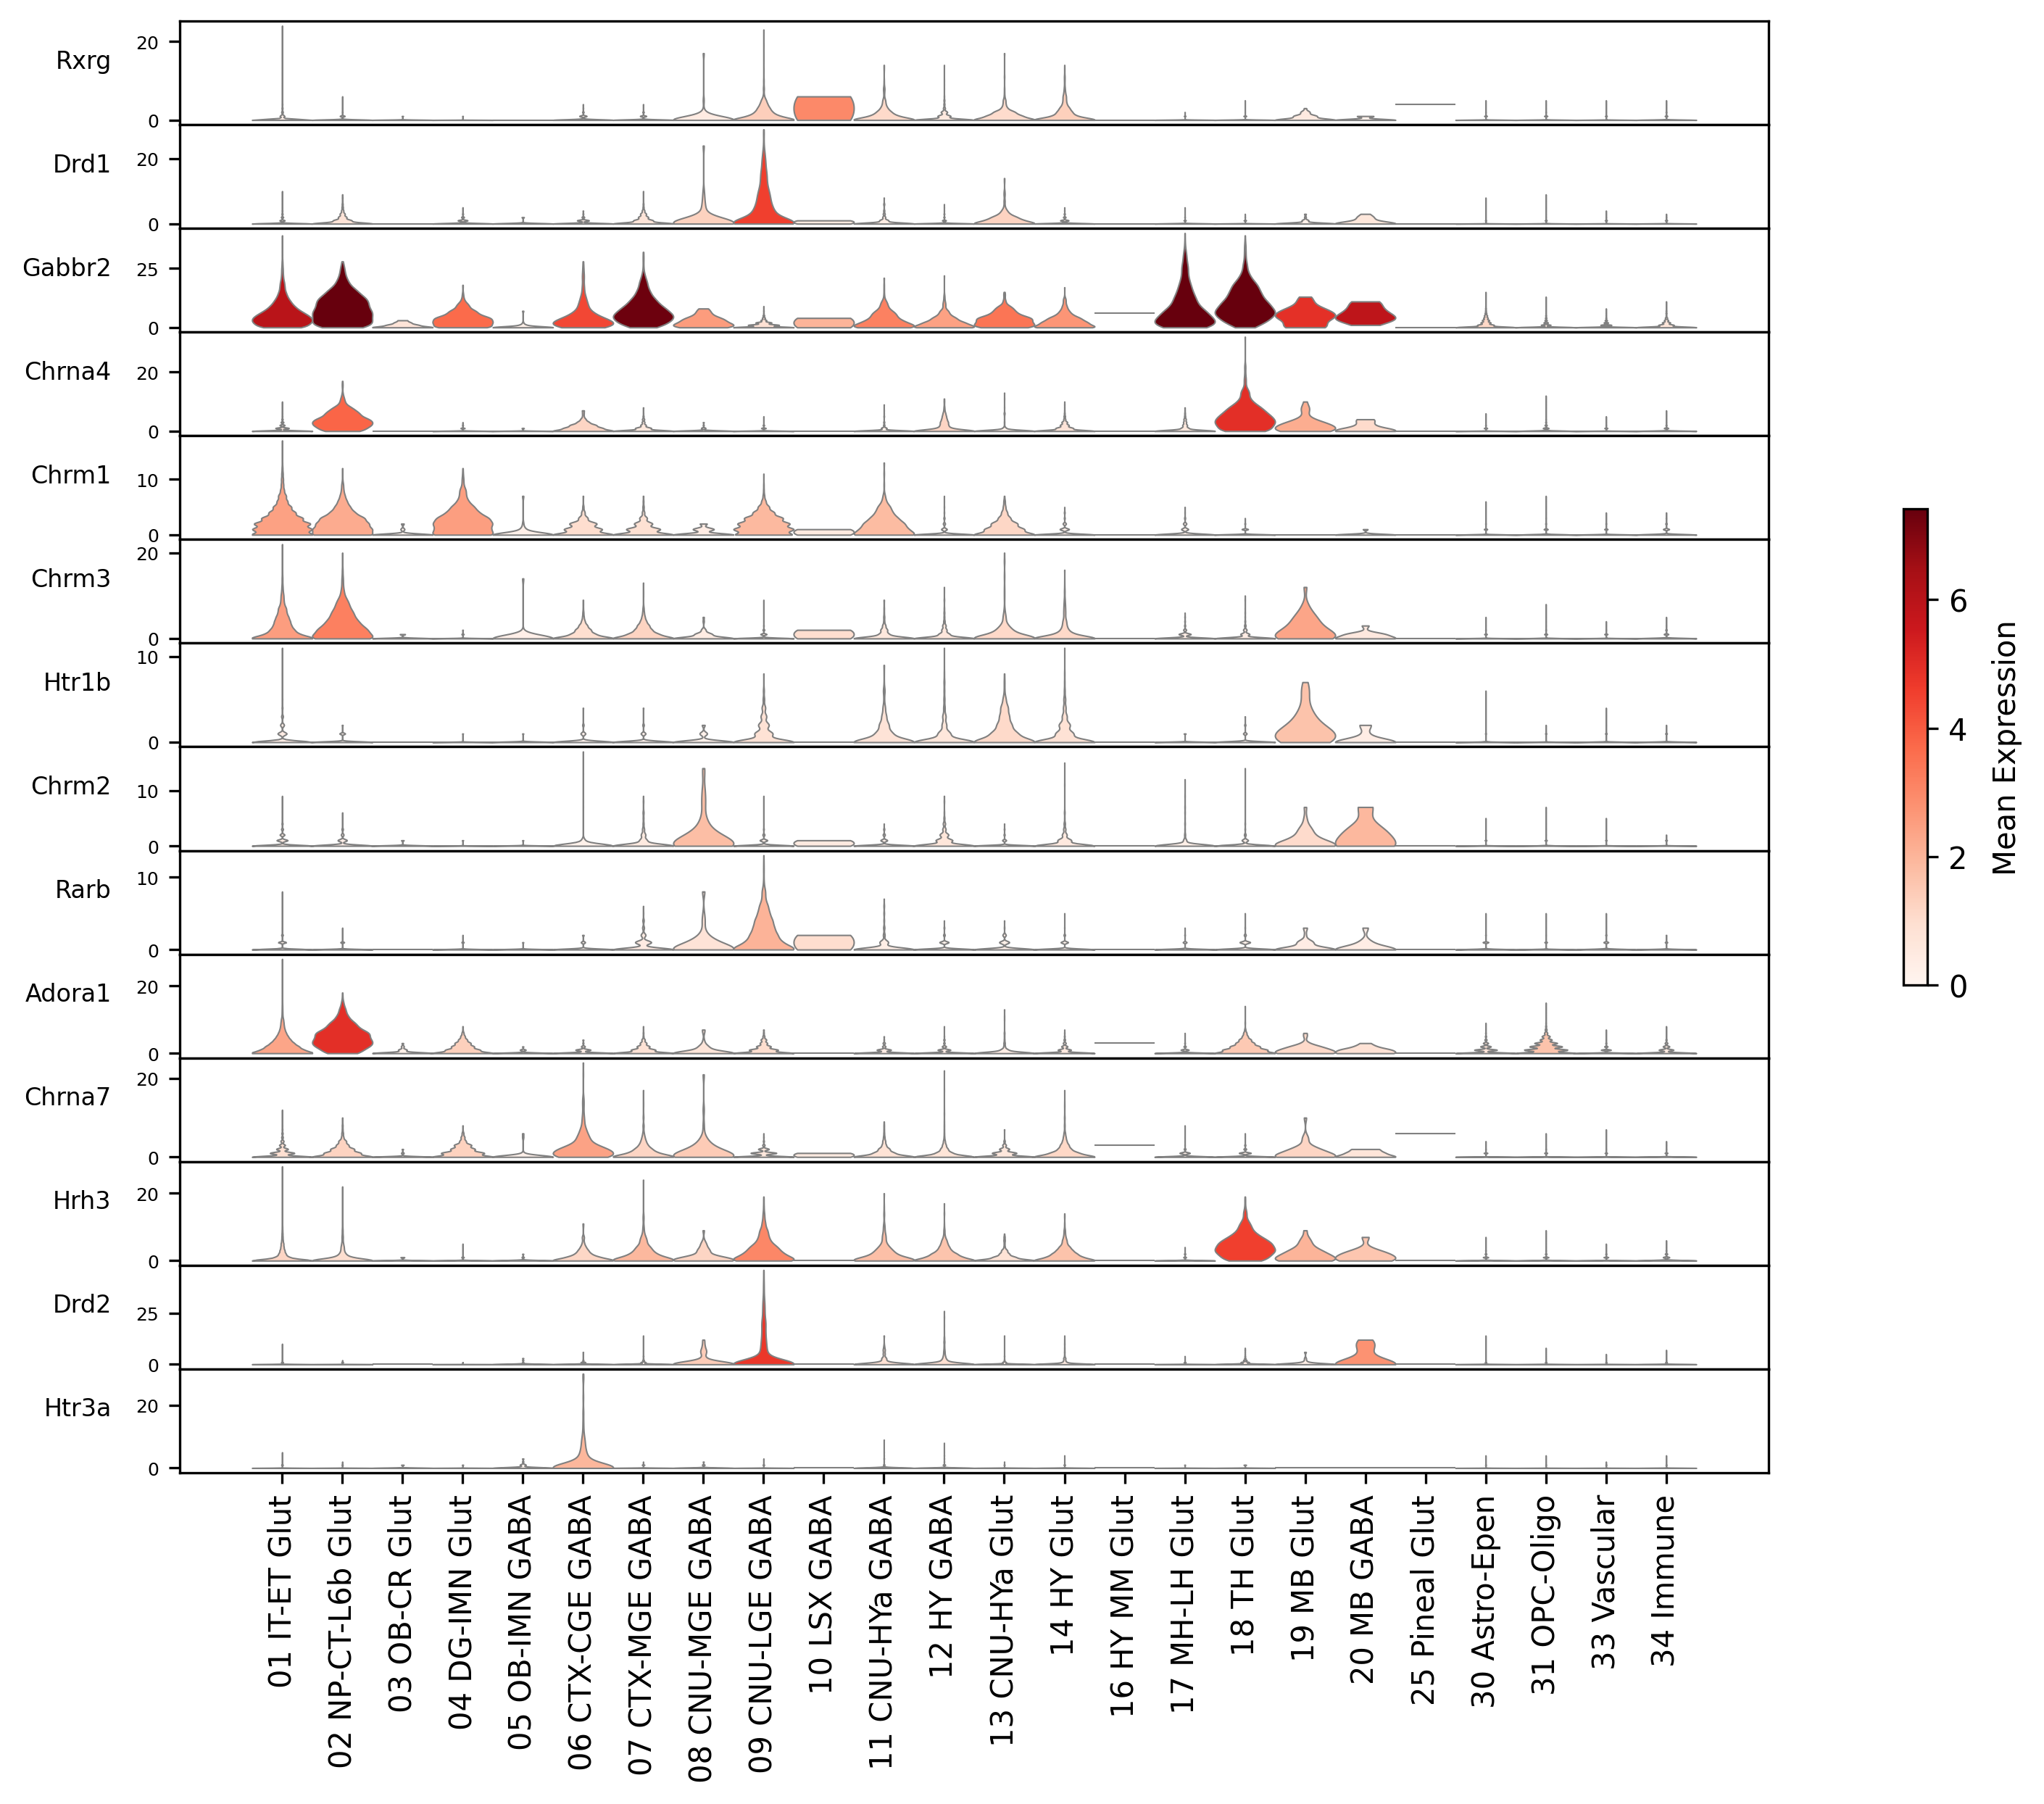

[June 12, 2024 15:43:19]: Warnings: no metabolites to plot


In [27]:
## violin plot to show the expression of informative sensors in communication

good_sensor = commu_df[(commu_df['permutation_test_fdr']<=0.05)]['Sensor'].sort_values().unique()

mebo_obj.violin_plot(
                    sensor_or_met=good_sensor,
                    cell_focus=[],
                    cmap=None,
                    vmin=None,
                    vmax=None,
                    figsize='auto',
                    cbar_title='',
                    save=None,
                    show_plot=True
                    )